![Excalidraw Image](../pictures/Help.png)<br>

### **一、MAD**
#### 1. 算法简介
&emsp;&emsp;绝对中位差(MedianAbsolute Deviation, MAD)是一种次啊用计算各观测值与平均值的距离综合的检测离群值的方法。
#### 2. 使用场景
&emsp;&emsp;本算法适用于对<font color=red>单指标数值型</font>数据进行异常值检测
#### 3. 算法原理
![Excalidraw Image](../pictures/MAD.png)<br>
&emsp;&emsp;如上图所示，首先求得指标A的中位数MA，再用指标A所有的值分别减去MA得到变量B的值，对B的值求绝对值后再求其中位数MC，并对MC进行MAD校正得到MAD，根据MAD和MA确定正常的范围，超出此范围的数值会被认定为异常值。<br>
**论文原文链接**：<https://books.google.com/books?hl=zh-CN&lr=&id=FuuiEAAAQBAJ&oi=fnd&pg=PP1&dq=Iglewicz,+B.+and+Hoaglin,+D.C.,+1993.+How+to+detect+and+handle+outliers+(Vol.+16).+Asq+Press.&ots=SEU5R3XTQn&sig=3bGO1vTuZpQfPE8QIfX7QGyjTq8#v=onepage&q=Iglewicz%2C%20B.%20and%20Hoaglin%2C%20D.C.%2C%201993.%20How%20to%20detect%20and%20handle%20outliers%20(Vol.%2016).%20Asq%20Press.&f=false>

#### 4. 运行示例
(1) 导入MAD相关的包

In [1]:
from pyod.models.mad import MAD
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

(2) 导入训练数据，将数据按照4：1分割成训练集和测试集，注意X要为单变量，shape为(n_samples, 1)

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

data = pd.read_csv('../test_data/changepoint_data_9_from2018-12-19to2019-01-31_8249.csv')
X = data['value']
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train=np.array(X_train)
X_train=X_train.reshape(-1, 1)
X_test=np.array(X_test)
X_test=X_test.reshape(-1, 1)

(3) 指定检测算法的名字为'MAD'，建立MAD对象并设置倍数threshold为3.5。用训练数据X_train进行训练

In [20]:
clf_name = 'MAD'
clf = MAD(threshold=3.5)
clf.fit(X_train)

MAD(threshold=3.5)

(4) 获取训练数据X_train原本的标签y_train_pred，并计算训练数据的离群值分数y_train_scores，离群值分数越高越被怀疑为异常

In [21]:
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

(5) 通过训练数据X_test对clf进行测试得到y_test_pred，并计算测试数据的离群值分数y_test_scores

In [22]:
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

(6) 对训练和测试的结果进行评估，ROC越大模型预测的性能越佳，precision@rank越大准确率越高

In [23]:
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)


On Training Data:
MAD ROC:0.8921, precision @ rank n:0.8522

On Test Data:
MAD ROC:0.8951, precision @ rank n:0.8


(7) 对结果进行可视化

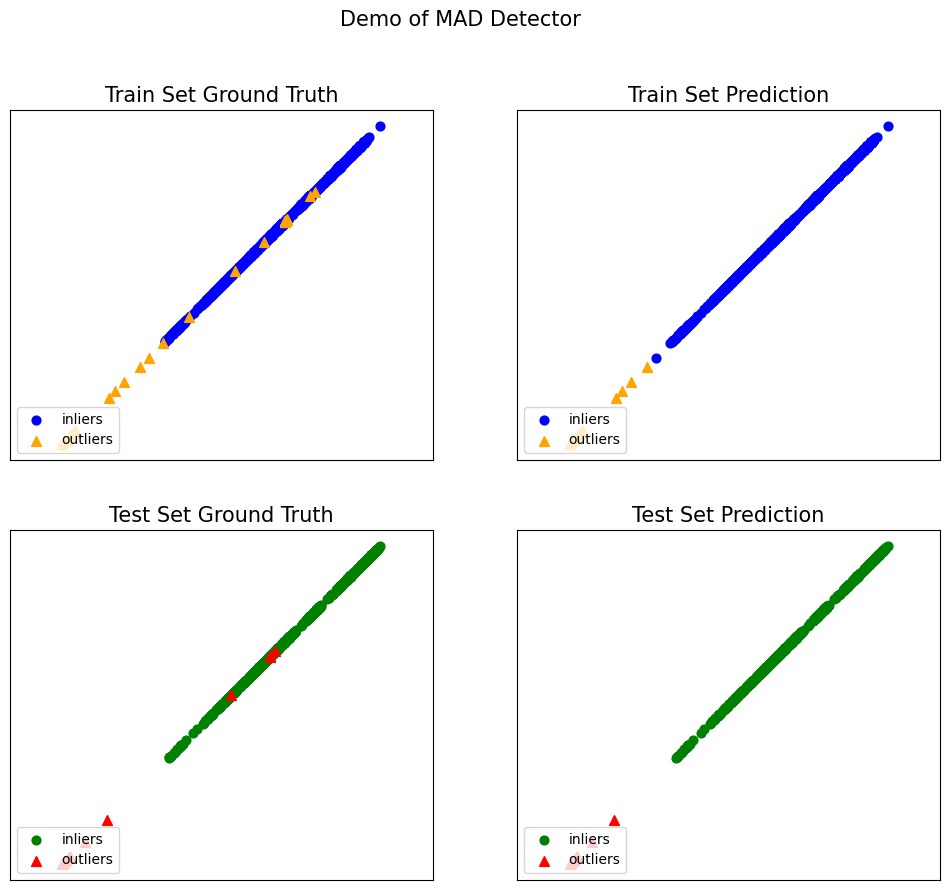

In [24]:
visualize(clf_name, np.hstack((X_train, X_train)), y_train, np.hstack((X_test, X_test)), y_test, y_train_pred, y_test_pred, show_figure=True, save_figure=False)

### **二、ABOD**
#### 1. 算法简介
&emsp;&emsp;高维度下距离同质化，角度比距离更稳定，因此基于角度的异常值检测(Angle-Based Outlier Detection, ABOD)关注了一组多变量特征空间中的任意三个数据点所形成的角度，而角度的围度对于离群点和正常点来说是不同的，由此对异常点进行检测。
#### 2. 使用场景
&emsp;&emsp;适用于<font color='red'>高维的多指标异常检测</font>（指标数高于25），数据维度越高算法表现越好，指标数量少会导致算法准确率较低，同时该算法所耗费的<font color='red'>时间成本较高</font>。<font color='red'>可以对所有的数据点进行异常度量</font>，异常度量越高越有可能为异常值，阈值可根据实际情况调整。
#### 3. 算法原理
![Excalidraw Image](../pictures/ABOD.png)<br>
&emsp;&emsp;该算法主要思路是通过比较数据点之间的差向量的角度来判断异常值，通过计算差向量的角度变化，算法可以捕捉到数据点与其他点之间的差异和偏移，进而识别出潜在的异常值。由于该算法不依赖于任何参数的选择，因此可以减少主观因素对异常检测结果的影响。<br>
**论文原文链接**：<https://www.dbs.ifi.lmu.de/Publikationen/Papers/KDD2008.pdf>
#### 4. 运行示例
(1) 导入ABOD相关包，导入数据，建立ABOD对象并进行训练和测试，对训练和测试的结果进行评估(使用的是38维的数据集数据，未进行可视化)

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from pyod.models.abod import ABOD
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

data = pd.read_csv('../test_data/machine-1-1.csv')
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf_name = 'ABOD'
clf = ABOD()
clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)


On Training Data:
ABOD ROC:0.7941, precision @ rank n:0.3585

On Test Data:
ABOD ROC:0.8005, precision @ rank n:0.3686


### **三、SUOD**
#### 1. 算法简介
&emsp;&emsp;训练或者用大量无监督模型做预测会面临巨大的开销问题，尤其在高维度、大数据上，很多时候甚至无法收敛，因此提出了SUOD。SUOD是异质无监督模型，通过JL Projection降维解决高维问题，使用近似regressor替代无监督模型加速预测过程，并对模型的训练进行平衡的并行调度从而提高系统运行性能。
#### 2. 使用场景
&emsp;&emsp;本算法适用于<font color=red>数据维度较高</font>、对处理速度有一定要求的情况。
#### 3. 算法原理
![Excalidraw Image](../pictures/SUOD.png)<br>
&emsp;&emsp;简单来说，当输入x_train训练数据后首先会对高维的训练数据进行降维操作，然后再并行训练多个基础model并得到每个model的权重，保存训练得到的y_train。再用x_train和y_train训练近似model（默认用随机森林），若近似的model比基础model性能好将会对基础模型进行替换。当输入x_text对数据已经异常检测时，则会调用训练好的近似model/基础model对每个sample进行异常分数计算，加权得到最终的集成异常分数，再将异常分数与阙值进行比较。<br>
**原文论文链接**：<https://www.andrew.cmu.edu/user/yuezhao2/papers/21-mlsys-suod.pdf>

#### 4. 运行示例
(1) 导入SUOD相关的包，导入训练数据，将数据按照4：1分割成训练集和测试集

In [6]:
from pyod.models.suod import SUOD
from pyod.utils import evaluate_print
from pyod.utils.example import visualize

import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('../test_data/machine-1-1.csv')
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(2) 指定检测算法的名字为'SUOD'，并为加速初始化一组异常检测器。建立SUOD对象，确定并行进程的数量，并采用组合方法。用训练数据X_train进行训练（训练基础models的同时会进行模型近似）

In [7]:
from pyod.models.copod import COPOD
from pyod.models.iforest import IForest
from pyod.models.lof import LOF

clf_name = 'SUOD'

detector_list = [LOF(n_neighbors=15), LOF(n_neighbors=20),
                 LOF(n_neighbors=25), LOF(n_neighbors=35),
                 COPOD(), IForest(n_estimators=100),
                 IForest(n_estimators=200)]

clf = SUOD(base_estimators=detector_list, n_jobs=2, combination='average', verbose=False)

# or to use the default detectors
# clf = SUOD(n_jobs=2, combination='average', verbose=False)
clf.fit(X_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   31.8s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed: 35.2min finished


SUOD(approx_clf=None, approx_clf_list=None, approx_flag_global=True,
   approx_ng_clf_list=None,
   base_estimators=[LOF(algorithm='auto', contamination=0.1, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=1, n_neighbors=15, novelty=True, p=2), LOF(algorithm='auto', contamination=0.1, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=1, n_neighbors=20, novelty=True, p=2...features=1.0,
    max_samples='auto', n_estimators=200, n_jobs=1, random_state=None,
    verbose=0)],
   bps_flag=True, combination='average', contamination=0.1,
   cost_forecast_loc_fit=None, cost_forecast_loc_pred=None,
   jl_method='basic', n_jobs=2, rp_clf_list=None, rp_flag_global=True,
   rp_ng_clf_list=None, target_dim_frac=0.5, verbose=False)

(3) 获取训练数据原本的标签y_train_pred和测试数据预测的标签y_test_pred，并计算数据的离群值分数y_train_scores和y_test_scores。对训练和测试数据进行评估，可视化结果

In [8]:
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)

# visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred, y_test_pred, show_figure=True, save_figure=False)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    8.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.




On Training Data:
SUOD ROC:0.8093, precision @ rank n:0.3608

On Test Data:
SUOD ROC:0.8382, precision @ rank n:0.3941


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    4.9s finished


### 四、IForest
#### 1. 算法简介
&emsp;&emsp;孤立森林(Isolation Forest, IForest)是一个基于Ensemble的无监督异常检测方法，具有线性时间复杂度和高精确度。IForest使用了比较高效的策略，密度较高的簇需要被切割很多次才能将每个数据点分到单独的子空间中，而密度很低的点很容易就被分割到一个子空间中了。
#### 2. 使用场景
&emsp;&emsp;适用于<font color='red'>连续数据</font>的异常检测，可以用于<font color='red'>数据规模较大</font>的数据集（可以增加树的数量以增加算法稳定性，每棵树相互独立，可不属于大规模分布式系统加速运算），<font color='red'>不适用于维度过高大数据</font>，会导致算法可靠性降低。
#### 3. 算法原理
![Excalidraw Image](../pictures/IForest.png)<br>
&emsp;&emsp;该算法采用两个阶段的过程进行异常检测。第一阶段是训练阶段，对训练集数据进行子采样，通过递归将训练集进行划分直到数据点被孤立或达到limited hegiht，从而构建一系列的孤立树(iTree)，构建每棵孤立树时分割的指标随机选取，分割的值产生于指标值最大与最小值之间。第二阶段是评估阶段，将每个数据点通过每棵iTree，计算每个数据点在所有iTree上的平均路径长度(Average Path Length, APL)，用以衡量异常得分，将APL归一化于0-1范围内得到异常得分，异常得分远小于1表示明确正常，越接近1越有可能为异常点（异常点远离密度高的簇，很容易被分到一个子空间，因此平均路径长度会较短，如iTree1中的a）。<br>
**论文原文链接**：<https://www.researchgate.net/publication/224384174_Isolation_Forest>
#### 4. 运行示例
(1) 导入IForest相关包，导入数据，建立IForest对象并进行训练和测试，对训练和测试的结果进行评估。在建立IForest对象的时候可以通过n_estimators参数设置ITree的数量，默认为100棵

In [ ]:
from pyod.models.iforest import IForest
from pyod.utils.data import evaluate_print

import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('../test_data/machine-1-1.csv')
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# train IForest detector
clf_name = 'IForest'
clf = IForest()
clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)

# example of the feature importance
feature_importance = clf.feature_importances_
print("Feature importance", feature_importance)

d:\LogReduce\aiops-notebook\venv\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
d:\LogReduce\aiops-notebook\venv\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(



On Training Data:
IForest ROC:0.8999, precision @ rank n:0.4702

On Test Data:
IForest ROC:0.9034, precision @ rank n:0.4588
Feature importance [0.03428396 0.034843   0.03203743 0.03310652 0.         0.03815322
 0.03634462 0.         0.02837419 0.02775229 0.04489681 0.0258147
 0.02940287 0.03970696 0.03595077 0.03791179 0.         0.
 0.0340158  0.03604723 0.03673063 0.03494963 0.0262894  0.03502489
 0.03553517 0.03034226 0.00040033 0.02478048 0.00405173 0.03533765
 0.02973521 0.03117966 0.02374287 0.03473133 0.03139043 0.03713616
 0.         0.        ]


### 五、KNN
#### 1. 算法简介
&emsp;&emsp;K-近邻(K-NearestNeighbor, KNN)算法是一种基于距离的无监督机器学习异常检测算法。异常点一定是和大部分的正常数据点隔的很远，基于这个思想KNN只需要依次计算每个数据点与它最近的K个样本的距离，再将距离与阈值进行比较即可得到异常点。
#### 2. 使用场景
&emsp;&emsp;适用于<font color='red'>不知道数据分布</font>的异常检测，<font color='red'>不适合高维度数据</font>，且由于只能找出异常点不能找出异常簇，每次计算距离都需要遍历整个数据集，时间复杂度较高。
#### 3. 算法原理
![Excalidraw Image](../pictures/KNN.png)<br>
(1) 计算数据集中各数据点与其他每个点之间的距离，默认使用欧氏距离作为距离度量；<br>
(2) 按照距离递增的次序排序，选取与当前点距离最小的K个点（K值根据问题特定需求和实验经验选择，默认为5）；<br>
(3) 计算当前点与K个邻居的距离，并取均值或者中值、最大值（通过参数method设置）作为异常值，异常值越大越可能为异常点。<br>
**论文原文链接**：<https://dl.acm.org/doi/pdf/10.1145/342009.335437>
#### 4. 运行示例
(1) 导入KNN相关包，导入数据，建立KNN对象并进行训练和测试，对训练和测试的结果进行评估。可以通过n_neighbors设置K值，通过methon设置取平均值/中值/最大值

In [3]:
from pyod.models.knn import KNN
from pyod.utils.data import evaluate_print

import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('../test_data/machine-1-1.csv')
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# train kNN detector
clf_name = 'KNN'
clf = KNN()
clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)


On Training Data:
KNN ROC:0.8471, precision @ rank n:0.4153

On Test Data:
KNN ROC:0.8536, precision @ rank n:0.4471


### 六、ECOD
#### 1. 算法简介
&emsp;&emsp;经验累积离群值检测(Empirical Cumulative Outlier Detection, ECOD)算法是一种无监督异常检测算法，其核心思想是利用经验累积分布函数(ECDF)来估计数据的联合累积分布函数（结合同一样本不同维度的离群分数计算每个样本的离群分数），从而计算异常值的概率。该算法灵感来源于——离群值通常是出现在分布尾部的罕见事件。
#### 2. 使用场景
&emsp;&emsp;适用于<font color='red'>高维度数据且希望获得解释性结果</font>的异常检测，能够<font color='red'>了解到哪些指标造成数据点异常的可能性高</font>，具有较低的时间和空间复杂度，能够通过并行计算来加速处理。
#### 3. 算法原理
![Excalidraw Image](../pictures/ECOD.png)<br>
&emsp;&emsp;该算法首先计算每个维度（指标）的左尾ECDF和右尾ECDF，然后再计算每个维度的偏度skewness，最后基于此分别进行概率聚合。遍历每个数据点，左尾ECDF聚合得到Oleft-only，右尾聚合得到Oright-only，根据skewness决定适用左尾ECDF还是右尾ECDF计算得到Oauto，取三者最大值作为数据点的异常值，可以设置阈值筛选出异常点。<br>
**论文原文链接**：<https://www.researchgate.net/publication/357552688_ECOD_Unsupervised_Outlier_Detection_Using_Empirical_Cumulative_Distribution_Functions>
#### 4. 运行示例
(1) 导入ECOD相关包，导入数据，建立ECOD对象并进行训练和测试，对训练和测试的结果进行评估

In [9]:
from pyod.models.ecod import ECOD
from pyod.utils.data import evaluate_print

import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('../test_data/machine-1-1.csv')
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train ECOD detector
clf_name = 'ECOD'
clf = ECOD()

# you could try parallel version as well.
# clf = ECOD(n_jobs=2)
clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)


On Training Data:
ECOD ROC:0.8026, precision @ rank n:0.2642

On Test Data:
ECOD ROC:0.8074, precision @ rank n:0.249


### 七、XGBOD
#### 1. 算法简介
&emsp;&emsp;基于极限增强的离群值检测(Extreme Boosting Based Outlier Detection, XGBOD)算法是一种用于改进有监督异常检测的半监督集成算法，该算法通过各种无监督离群值检测函数扩充原始的特征空间，并采用贪婪算法对增广特征空间进行剪枝，以控制计算复杂度，最后用监督集成方法XGBoost作为精细化特征空间的最终输出分类器。
#### 2. 使用场景
&emsp;&emsp;适用于<font color='red'>有标签或部分标签数据</font>的异常检测，能够在高维特征空间特区和利用更多信息，能够通过调整基础无监督模型的参数产生各种准确性和多样性的TOS，适用于需要在<font color='red'>准确性和多样性之间平衡</font>的情况下提升性能的情况。
#### 3. 算法原理
![Excalidraw Image](../pictures/XGBOD.png)<br>
&emsp;&emsp;XGBOD算法共分为三个阶段，分别是特征变换阶段、TOS选择阶段和最终预测阶段：<br>
&emsp;&emsp;(1) 特征变换阶段：通过多种无监督离群值检测方法获得离群值评分TOS。算法适用不同的无监督离群值检测方法作为基础的异常评分函数，并调整它们的参数以产生不同准确性和多样性的TOS，这些TOS被看作新的特征，用于改进原始的特征空间；<br>
&emsp;&emsp;(2) TOS选择阶段：从生成的TOS集合中选择一部分与原始特征进行结合。为了选择TOS，算法提出了随机选择、准确选择和平衡选择三种选择方法。随机选择可以产生较为不确定和不稳定的结果，平衡选择在具有更多特征（指标）的数据集上效果较好，而平衡选择在具有较少特征（指标）的数据集上表现更加出色。选择的TOS与原始特征结合形成了一个改进后的特征空间；<br>
&emsp;&emsp;(3) 最终预测阶段：训练XGBoost分类器，输出最终异常检测结果。<br>
**论文原文链接**：<https://arxiv.org/ftp/arxiv/papers/1912/1912.00290.pdf>
#### 4. 运行示例
(1) 导入XGBOD相关包，导入数据，建立XGBOD对象并进行训练和测试，对训练和测试的结果进行评估

In [2]:
from pyod.models.xgbod import XGBOD
from pyod.utils.data import evaluate_print

import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('../test_data/machine-1-1.csv')
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train XGBOD detector
clf_name = 'XGBOD'
clf = XGBOD()
clf.fit(X_train, y_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)

d:\LogReduce\aiops-notebook\venv\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
d:\LogReduce\aiops-notebook\venv\lib\site-packages\xgboost\core.py:160: UserWarning: [12:00:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)



On Training Data:
XGBOD ROC:0.9985, precision @ rank n:0.9574

On Test Data:
XGBOD ROC:0.9966, precision @ rank n:0.9451


### 八、INNE
#### 1. 算法简介
&emsp;&emsp;为克服IForest算法在数值型数据上不擅长处理局部相对稀疏点、不适用于特别高维度的数据等问题，适用最近邻集成的基于隔离的异常检测(Isolation‐Based Anomaly Detection Using Nearest‐Neighbor Ensembles, INNE)借鉴孤立机制并结合最近邻距离计算方法，采用多维超球体切割数据空间实现孤立机制，并考虑了数据局部分布特性。
#### 2. 使用场景
&emsp;&emsp;适用于<font color='red'>低相关性指标数据</font>的异常检测，该算法能够很好适应不同数据集中的异常情况，能够方便处理<font color='red'>高维度数据</font>，捕捉高维空间中局部异常的情况。
#### 3. 算法原理
![Excalidraw Image](../pictures/INNE.png)<br>
&emsp;&emsp;在训练阶段，从训练集中随机抽取t个子样本构建一个超球集合，对每个数据点进行最近邻搜索，找到与之距离最近的邻居，并基于邻居的属性计算最小的超球体半径，使得超球体能过够包含当前数据点和其邻居。在测试阶段，将每个测试的数据点放进每个超球体中计算孤立得分，根据所在超球体的相对大小和邻居超球体大小的比值进行计算，然后取平均值作为最终的异常值。<br>
**论文原文链接**：<https://www.researchgate.net/profile/Tharindu-Bandaragoda/publication/322359651_Isolation-based_anomaly_detection_using_nearest-neighbor_ensembles_iNNE/links/5e91651092851c2f5294c5ac/Isolation-based-anomaly-detection-using-nearest-neighbor-ensembles-iNNE.pdf>
#### 4. 运行示例
(1) 导入INNE相关包，导入数据，建立INNE对象并进行训练和测试，对训练和测试的结果进行评估。可以通过max_samples设置需要抽取的子样本的数量

In [6]:
from pyod.models.inne import INNE
from pyod.utils.data import evaluate_print

import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('../test_data/machine-1-1.csv')
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train INNE detector
clf_name = 'INNE'
clf = INNE(max_samples=4)
clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)


On Training Data:
INNE ROC:0.9219, precision @ rank n:0.6218

On Test Data:
INNE ROC:0.9227, precision @ rank n:0.6


### 九、KPCA
#### 1. 算法简介
&emsp;&emsp;核主成分分析(Kernel Principal Component Analysis, KPCA)是主成分分析(Principal Component Analysis, PCA)的一种非线性扩展方法。由于运维数据往往包含复杂的时间依赖性、趋势等这些因素使得运维数据的分布通常是非线性的，因此采用KPCA进行异常检测比PCA更为合适。KPCA通过将训练数据映射到一个无线维的特征空间中，从该空间中提取数据分布的主成分，使用主成分对数据进行重构，通过计算重构误差指示数据的离群程度。
#### 2. 使用场景
&emsp;&emsp;适用于<font color='red'>非线性数据分布、具有复杂数据结构</font>的异常检测，传统的线性方法如PCA无法准确捕捉数据中的一场模式，如果数据结构较复杂，KPCA能过够通过核函数和无线维特征空间更好处理复杂的数据。
#### 3. 算法原理
![Excalidraw Image](../pictures/KPCA.png)<br>
&emsp;&emsp;(1) 数据预处理：对输入数据进行清洗、标准化或归一化；<br>
&emsp;&emsp;(2) 数据映射：使用选择的核函数将数据映射到一个无限维的特征空间中。常用的核函数包括高斯核函数核多项式核函数；<br>
&emsp;&emsp;(3) 特征提取：在映射后的特征空间中应用KPCA提取数据的主成分。可以通过计算相似度矩阵、去中心化的Gram矩阵和特征向量等步骤实现；<br>
&emsp;&emsp;(4) 计算重构误差：使用提取的主成分对数据进行重构，并计算重构误差（即原始数据与重构数据之间的差距）；<br>
&emsp;&emsp;(5) 异常检测：利用重构误差作为异常度量，通过设定阈值将数据分类为正常或异常。<br>
**论文原文链接**：<https://www.heikohoffmann.de/documents/hoffmann_kpca_preprint.pdf>
#### 4. 运行示例
(1) 导入KPCA相关包，导入数据，建立KPCA对象并进行训练和测试，对训练和测试的结果进行评估。可以通过kernel设置使用的核函数，可选择linear、poly、sigmoid、cosine、precomputed，默认为rbf，也可以通过kernel_params设置核相关参数

In [7]:
from pyod.models.kpca import KPCA
from pyod.utils.data import evaluate_print

import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('../test_data/machine-1-1.csv')
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train KPCA detector
clf_name = "KPCA"
clf = KPCA()
clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)


On Training Data:
KPCA ROC:0.9064, precision @ rank n:0.5321

On Test Data:
KPCA ROC:0.9096, precision @ rank n:0.5353


### 十、One-Class SVM
#### 1. 算法简介
&emsp;&emsp;One-Class SVM是一种经典的无监督机器学习算法，在这种算法中，只有一个类别的训练数据，即正常样本，而没有异常样本。One-Class SVM的目标是学习一个超平面，将正样本从原点分离开，同时最大化超平面与原点之间的距离。与普通的二分类问题不同的是，One-Class SVM只有一个类，不属于该类全部判定为“异常”。
#### 2. 使用场景
&emsp;&emsp;适用于<font color='red'>异常数据很少或完全没有、正常与异常样本在特征空间存在较大差距</font>的异常检测。
#### 3. 算法原理
![Excalidraw Image](../pictures/OCSVM.png)<br>
&emsp;&emsp;在算法的训练阶段，首先需要收集正常样本的数据，其中不包含异常样本，使用合适的核函数将数据映射到一个高维特征空间，并在高维特征空间中训练One-Class SVM模型，将正常样本从原点分开并最大化两者间隔。在预测阶段，对于每个新样本，利用训练好的模型计算样本到超平面的距离或决策函数的值，若距离或决策函数的值超过预先设定的阈值则将其归类为异常样本。<br>
**论文原文链接**：<https://sci-hub.hkvisa.net/10.1162/089976601750264965>
#### 4. 运行示例
(1) 导入One-Class SVM相关包，导入数据，建立One-Class SVM对象并进行训练和测试，对训练和测试的结果进行评估

In [9]:
from pyod.models.ocsvm import OCSVM
from pyod.utils.data import evaluate_print

import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('../test_data/machine-1-1.csv')
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train one_class_svm detector
clf_name = 'OneClassSVM'
clf = OCSVM()
clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)

d:\LogReduce\aiops-notebook\venv\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but OneClassSVM was fitted without feature names
  warnings.warn(
d:\LogReduce\aiops-notebook\venv\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but OneClassSVM was fitted without feature names
  warnings.warn(



On Training Data:
OneClassSVM ROC:0.8417, precision @ rank n:0.3539

On Test Data:
OneClassSVM ROC:0.8392, precision @ rank n:0.3275
